# Customer Churn Analysis

This notebook is the result of a customer churn explorative data analysis that I performed as part of my Master's degree. The dataset was provided through the school. In this notebook, the data will be loaded, analyzed, cleaned, and preprocessed. Then predictive models will be built and evaluated. The purpose of the analysis is to prepare and explore the data,  identify the key factors that contribute to customer churn, and then build a predictive model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import *
from sklearn.metrics import accuracy_score
import prince

import seaborn as sb

# Silence future and user warnings
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)

# Nicer looking style for seaborn
sb.set(style="white")

## Explorative Data Analysis

In [2]:
original_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
original_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
print(original_data.Churn.describe())
print("-"*26)
print(original_data.Churn.value_counts())

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object
--------------------------
No     5174
Yes    1869
Name: Churn, dtype: int64


In [4]:
original_data.Churn.head(10)

0     No
1     No
2    Yes
3     No
4    Yes
5    Yes
6     No
7     No
8    Yes
9     No
Name: Churn, dtype: object

In [5]:
original_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

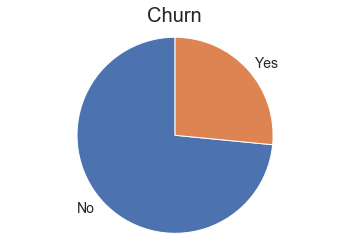

In [6]:
churn_counts = original_data['Churn'].value_counts()
churn_labels = original_data['Churn'].unique()
plt.pie(churn_counts, labels=churn_labels, startangle=90, textprops={'fontsize': 14})
plt.title("Churn", fontdict={'fontsize': 20})
plt.axis('equal')
plt.show()

In [7]:
original_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Categorical Features

There are several columns in the dataset that are categorical features. These fields need to be analyzed and prepared for machine learning algorithms. These features will be explored and cleaned up where necessary, then processed in preparation for statistical analysis.

In [8]:
original_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
exlude_columns = ['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn', 'customerID']
original_data.drop(exlude_columns, axis=1).iloc[:,:10].head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection  
0             DSL             No          Yes               No  
1             DSL            Yes           No              Yes  
2             DSL            Yes          Yes               No  
3             DSL            Yes           No              Yes  
4     Fiber optic             No           No               No

In [10]:
exlude_columns = ['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn', 'customerID']
original_data.drop(exlude_columns, axis=1).iloc[:,10:].head()

TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod  
0           Electronic check  
1               Mailed check  
2               Mailed check  
3  Bank transfer (automatic)  
4           Electronic check

In [11]:
original_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
original_data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

## Qualitative Features
Based on the number of unique values, lets take a look at the possible values of the discrete qualitative features.

In [13]:
qualitative_vars = original_data.nunique()[original_data.nunique() <= 4].keys().tolist()
for var in qualitative_vars:
    print(var, ":", original_data[var].unique().tolist())

gender : ['Female', 'Male']
SeniorCitizen : [0, 1]
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


### Redundant Information
Since the presence of internet connectivity and phone service are already represented in other features, lets simplify the values for these two columns.

In [14]:
original_data = original_data.replace({'No internet service': 'No'})
original_data = original_data.replace({'No phone service': 'No'})

In [15]:
# Convert all columns in the dataframe with 5 or fewer unique values into data type category
for column in original_data.columns:
    if len(original_data[column].unique()) <= 5:
        original_data[column] = original_data[column].astype('category')

In [16]:
original_data.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object

When originally converting the TotalCharges field datatype from an object to a float it resulted in 11 NA values, however the NA values did not show up when initially using the isna() method. After further investigation of one of the known NaN fields, it appears they have a space in them. Using applymap I was able to confirm that all 11 values that show up as NaN were space characters. These records will be dropped due to the potential significance of that field and how small of a portion of the overall number of records they account for.

In [17]:
# Example record with NA value after initial conversion
original_data.loc[6754].TotalCharges

' '

In [18]:
original_data.applymap(lambda x: x == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
original_data.TotalCharges = pd.to_numeric(
    original_data.TotalCharges, 
    errors='coerce').astype('float64')

In [20]:
original_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
original_data[original_data.TotalCharges.isnull()]

customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female             0     Yes        Yes       0   
753   3115-CZMZD    Male             0      No        Yes       0   
936   5709-LVOEQ  Female             0     Yes        Yes       0   
1082  4367-NUYAO    Male             0     Yes        Yes       0   
1340  1371-DWPAZ  Female             0     Yes        Yes       0   
3331  7644-OMVMY    Male             0     Yes        Yes       0   
3826  3213-VVOLG    Male             0     Yes        Yes       0   
4380  2520-SGTTA  Female             0     Yes        Yes       0   
5218  2923-ARZLG    Male             0     Yes        Yes       0   
6670  4075-WKNIU  Female             0     Yes        Yes       0   
6754  2775-SEFEE    Male             0      No        Yes       0   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
488            No            No             DSL            Yes  ...   
753           Yes            No              No             No  ...   
936           Yes            No             DSL            Yes  ...   
1082          Yes           Yes              No             No  ...   
1340           No            No             DSL            Yes  ...   
3331          Yes            No              No             No  ...   
3826          Yes           Yes              No             No  ...   
4380          Yes            No              No             No  ...   
5218          Yes            No              No             No  ...   
6670          Yes           Yes             DSL             No  ...   
6754          Yes           Yes             DSL            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
488               Yes         Yes         Yes              No  Two year   
753                No          No          No              No  Two year   
936               Yes          No         Yes             Yes  Two year   
1082               No          No          No              No  Two year   
1340              Yes         Yes         Yes              No  Two year   
3331               No          No          No              No  Two year   
3826               No          No          No              No  Two year   
4380               No          No          No              No  Two year   
5218               No          No          No              No  One year   
6670              Yes         Yes         Yes              No  Two year   
6754               No         Yes          No              No  Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
488               Yes  Bank transfer (automatic)          52.55           NaN   
753                No               Mailed check          20.25           NaN   
936                No               Mailed check          80.85           NaN   
1082               No               Mailed check          25.75           NaN   
1340               No    Credit card (automatic)          56.05           NaN   
3331               No               Mailed check          19.85           NaN   
3826               No               Mailed check          25.35           NaN   
4380               No               Mailed check          20.00           NaN   
5218              Yes               Mailed check          19.70           NaN   
6670               No               Mailed check          73.35           NaN   
6754              Yes  Bank transfer (automatic)          61.90           NaN   

      Churn  
488      No  
753      No  
936      No  
1082     No  
1340     No  
3331     No  
3826     No  
4380     No  
5218     No  
6670     No  
6754     No  

[11 rows x 21 columns]

In [22]:
# Dropping the 11 records in which TotalCharges was blank.
original_data.dropna(inplace=True)

In [23]:
original_data.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

### One-Hot Encoding

The non-binary categorical features one-hot encoding will be used as part of their preprocessing. The binary columns will be converted to true binary values as well. A new dataframe will be created named cleaned_data, which will contain only the preprocessed data.

In [24]:
cat_columns = original_data.select_dtypes(['category']).columns
binary_cols = original_data[cat_columns].drop('gender', axis=1).nunique()[original_data.nunique() == 2].keys().tolist()

dummy_cols = np.setdiff1d(list(cat_columns), binary_cols)

cleaned_data = pd.get_dummies(data=original_data[dummy_cols], columns=dummy_cols)
cleaned_data[binary_cols] = original_data[binary_cols].replace({'No': 0, 'Yes': 1})

### Checking for Outliers

Boxplots were generated for the continuous fields to quickly check for any possible outliers present in the data.

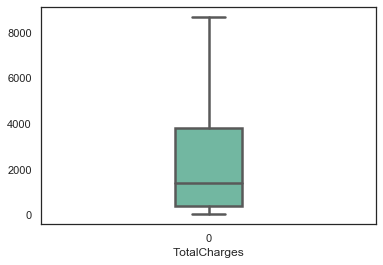

In [25]:
plot = sb.boxplot(data=original_data['TotalCharges'], width=0.2, linewidth=2.5, palette='BuGn_r').set(xlabel='TotalCharges')

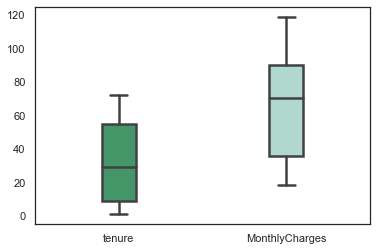

In [26]:
plot2 = sb.boxplot(data=original_data[['tenure', 'MonthlyCharges']], width=0.2, linewidth=2.5, palette='BuGn_r')

## Data Normalization

Convert the values of the three continuous columns to standard scale to improve model stability. Each column has a standard scaler fit directly to its data.

In [27]:
continuous_columns = original_data.drop('customerID', axis=1).select_dtypes(exclude='category').columns

for column in continuous_columns:
    scaler = StandardScaler()
    cleaned_data[column] = scaler.fit_transform(original_data[[column]])
cleaned_data.MonthlyCharges.head()

0   -1.161694
1   -0.260878
2   -0.363923
3   -0.747850
4    0.196178
Name: MonthlyCharges, dtype: float64

In [28]:
cleaned_data.columns

Index(['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [29]:
cleaned_data.head()

Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  ...  OnlineBackup  DeviceProtection  \
0                           0  ...             1                 0   
1                           1  ...             0                 1   
2                           1  ...             1                 0   
3                           0  ...             0                 1   
4                           0  ...             0                 0   

  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  Churn  \
0           0            0                0                 1      0   
1           0            0                0                 0      0   
2           0            0                0                 1      1   
3           1            0                0                 0      0   
4           0            0                0                 1      1   

     tenure  MonthlyCharges  TotalCharges  
0 -1.280248       -1.161694     -0.994194  
1  0.064303       -0.260878     -0.173740  
2 -1.239504       -0.363923     -0.959649  
3  0.512486       -0.747850     -0.195248  
4 -1.239504        0.196178     -0.940457  

[5 rows x 28 columns]

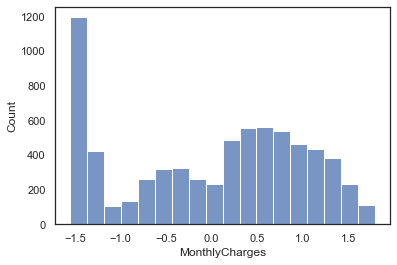

In [33]:
sb.histplot(cleaned_data.MonthlyCharges)

In [34]:
cleaned_data.SeniorCitizen = cleaned_data.SeniorCitizen.astype('uint8')

In [35]:
cleaned_data[['tenure', 'TotalCharges', 'MonthlyCharges']].describe()

tenure  TotalCharges  MonthlyCharges
count  7.032000e+03  7.032000e+03    7.032000e+03
mean  -1.126643e-16 -1.119064e-16    6.062651e-17
std    1.000071e+00  1.000071e+00    1.000071e+00
min   -1.280248e+00 -9.990692e-01   -1.547283e+00
25%   -9.542963e-01 -8.302488e-01   -9.709769e-01
50%   -1.394171e-01 -3.908151e-01    1.845440e-01
75%    9.199259e-01  6.668271e-01    8.331482e-01
max    1.612573e+00  2.824261e+00    1.793381e+00

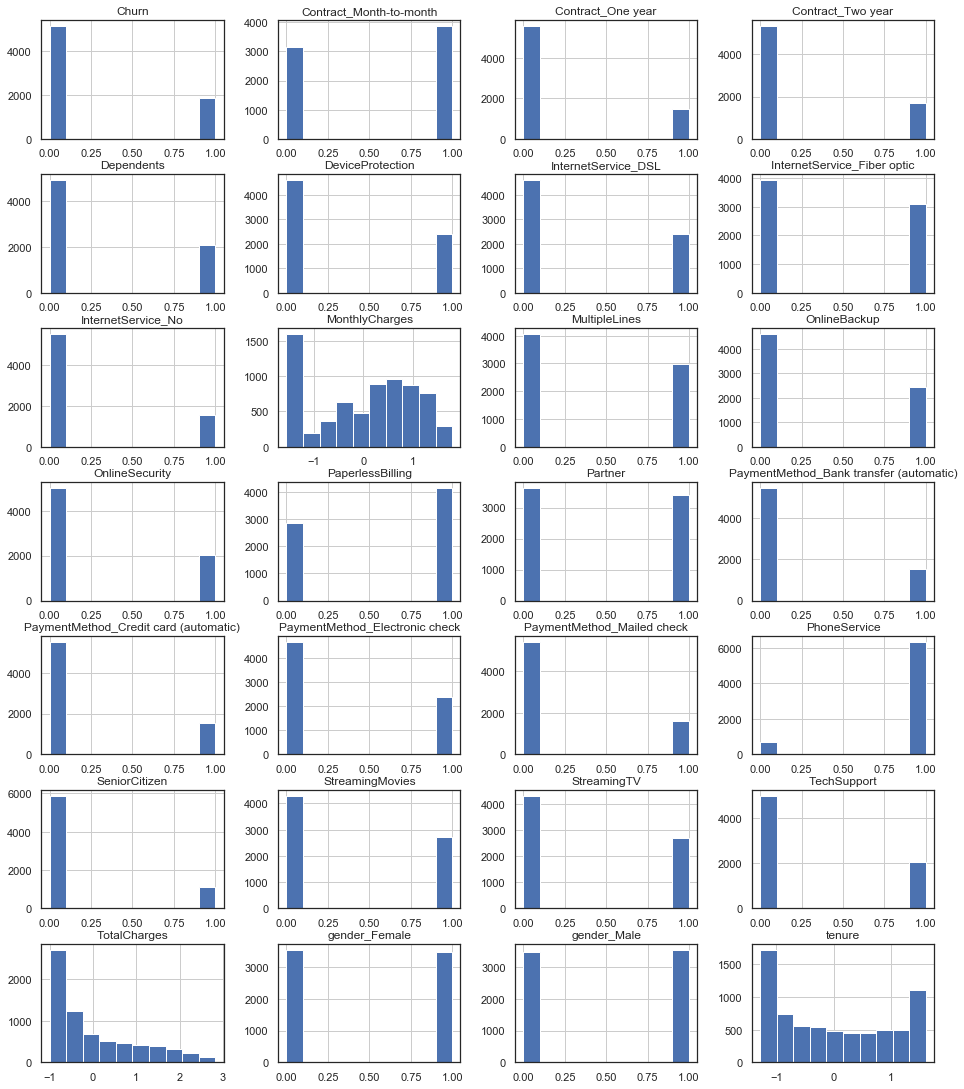

In [36]:
_ = cleaned_data.hist( figsize=(16,22), layout=(8,4))

In [37]:
cleaned_data.corrwith(cleaned_data.Churn, method='pearson')

Contract_Month-to-month                    0.404565
Contract_One year                         -0.178225
Contract_Two year                         -0.301552
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Credit card (automatic)     -0.134687
PaymentMethod_Electronic check             0.301455
PaymentMethod_Mailed check                -0.090773
gender_Female                              0.008545
gender_Male                               -0.008545
SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
PhoneService                               0.011691
MultipleLines                              0.040033
OnlineSecurity                            -0.171270
OnlineBackup                              -0.082307
DeviceProtec

### Correlations

Here any possible bivariate correlations are analyzed using the peasron correlation coeffficient, and are visually inspected using a heatmap.

In [38]:
cleaned_data.corr(method='pearson')

Contract_Month-to-month  \
Contract_Month-to-month                                 1.000000   
Contract_One year                                      -0.570053   
Contract_Two year                                      -0.621933   
InternetService_DSL                                    -0.065226   
InternetService_Fiber optic                             0.243014   
InternetService_No                                     -0.217824   
PaymentMethod_Bank transfer (automatic)                -0.180159   
PaymentMethod_Credit card (automatic)                  -0.204960   
PaymentMethod_Electronic check                          0.330879   
PaymentMethod_Mailed check                              0.006209   
gender_Female                                           0.003251   
gender_Male                                            -0.003251   
SeniorCitizen                                           0.137752   
Partner                                                -0.280202   
Dependents                                             -0.229715   
PhoneService                                           -0.001243   
MultipleLines                                          -0.088558   
OnlineSecurity                                         -0.246844   
OnlineBackup                                           -0.164393   
DeviceProtection                                       -0.225988   
TechSupport                                            -0.285491   
StreamingTV                                            -0.112550   
StreamingMovies                                        -0.117867   
PaperlessBilling                                        0.168296   
Churn                                                   0.404565   
tenure                                                 -0.649346   
MonthlyCharges                                          0.058933   
TotalCharges                                           -0.446776   

                                         Contract_One year  Contract_Two year  \
Contract_Month-to-month                          -0.570053          -0.621933   
Contract_One year                                 1.000000          -0.288843   
Contract_Two year                                -0.288843           1.000000   
InternetService_DSL                               0.047300           0.030924   
InternetService_Fiber optic                      -0.076809          -0.209965   
InternetService_No                                0.038061           0.217542   
PaymentMethod_Bank transfer (automatic)           0.057629           0.155004   
PaymentMethod_Credit card (automatic)             0.067590           0.174410   
PaymentMethod_Electronic check                   -0.109546          -0.281147   
PaymentMethod_Mailed check                        0.000197          -0.007423   
gender_Female                                    -0.007755           0.003603   
gender_Male                                       0.007755          -0.003603   
SeniorCitizen                                    -0.046491          -0.116205   
Partner                                           0.083067           0.247334   
Dependents                                        0.069222           0.201699   
PhoneService                                     -0.003142           0.004442   
MultipleLines                                    -0.003594           0.106618   
OnlineSecurity                                    0.100658           0.191698   
OnlineBackup                                      0.084113           0.111391   
DeviceProtection                                  0.102911           0.165248   
TechSupport                                       0.096258           0.240924   
StreamingTV                                       0.061930           0.072124   
StreamingMovies                                   0.064780           0.075603   
PaperlessBilling                                 -0.052278          -0.146281   
Churn                                      

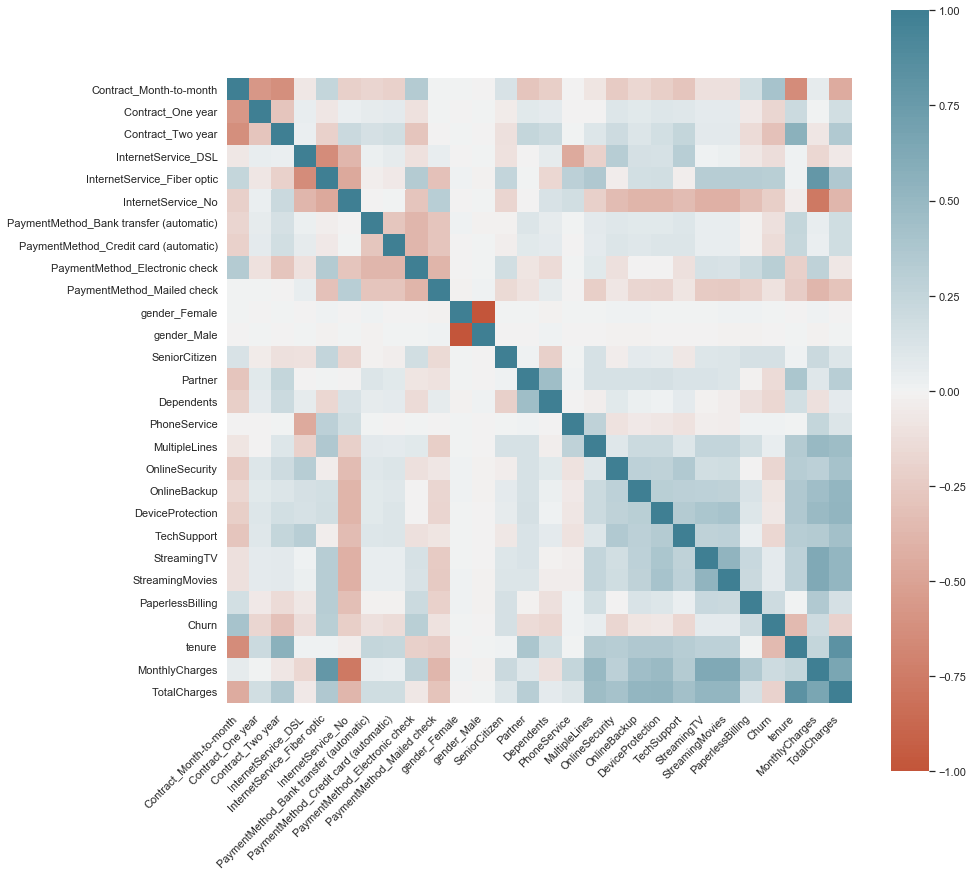

In [39]:
correlations = cleaned_data.corr()

f, ax = plt.subplots(figsize =(14, 14)) 
ax = sb.heatmap(
    correlations, 
    ax = ax,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [40]:
correlations = abs(correlations)

Based on the initial review of the bar chart below, having a month to month contract, fiber optic internet, and electronic payment setup show a strong correlation with customer churn. Inversely, individuals with higher tenure, two year contracts, and no internet services, were less likely to churn.

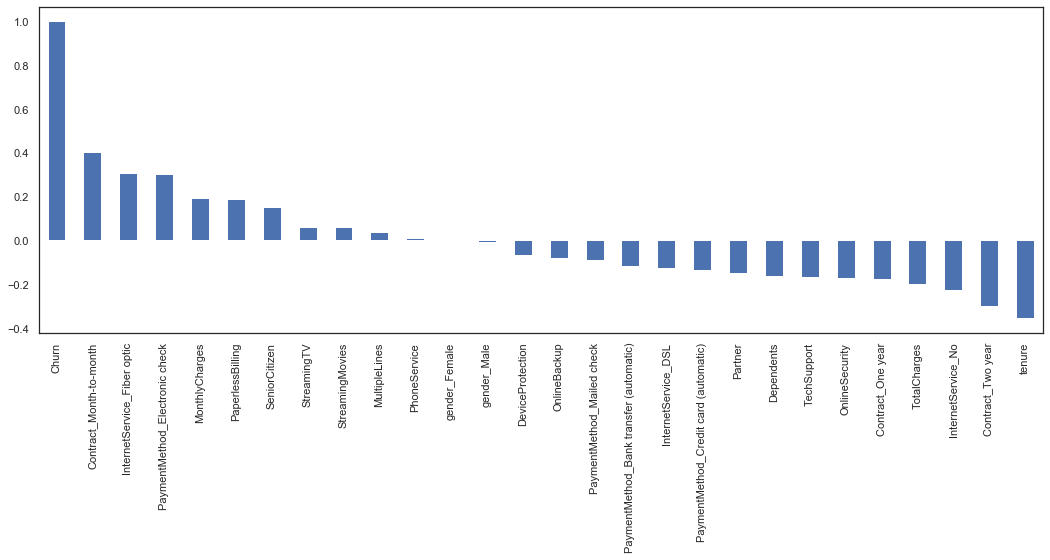

In [41]:
churn_correlation = cleaned_data.corrwith(cleaned_data.Churn, method='pearson')
plt.figure(figsize=(18,6))
churn_correlation.sort_values(ascending = False).plot(kind='bar')

In [42]:
cleaned_data['idx'] = cleaned_data.index

In [43]:
sorted_corr = churn_correlation.reindex(churn_correlation.abs().sort_values(ascending=False).index)

In [44]:
abs(sorted_corr)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
tenure                                     0.354049
InternetService_Fiber optic                0.307463
Contract_Two year                          0.301552
PaymentMethod_Electronic check             0.301455
InternetService_No                         0.227578
TotalCharges                               0.199484
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
Contract_One year                          0.178225
OnlineSecurity                             0.171270
TechSupport                                0.164716
Dependents                                 0.163128
SeniorCitizen                              0.150541
Partner                                    0.149982
PaymentMethod_Credit card (automatic)      0.134687
InternetService_DSL                        0.124141
PaymentMethod_Bank transfer (automatic)    0.118136
PaymentMetho

Based on their weak correlation, the following columns can be dropped from the data for predictive modeling.

In [45]:
abs(sorted_corr)[abs(sorted_corr) <= 0.1]
drop_columns = abs(sorted_corr)[abs(sorted_corr) <= 0.1].index
drop_columns

Index(['PaymentMethod_Mailed check', 'OnlineBackup', 'DeviceProtection',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService',
       'gender_Male', 'gender_Female'],
      dtype='object')

In [46]:
cleaned_data = cleaned_data.drop(drop_columns, axis=1)

In [47]:
top_cats = []

for variable in sorted_corr.index[1:]:
    if cleaned_data[variable].dtype == 'uint8':
        top_cats.append(variable)
    if len(top_cats) >= 8: break

### Categorical Distributions by Churn

Let's look at the distribution of different features that demonstrated a high correlation with customer Churn. Here you can see that anyone with a two year contract did not churn. With other features, there is a clear imbalance with most of them in the number of users that churned vs did not.

c:\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


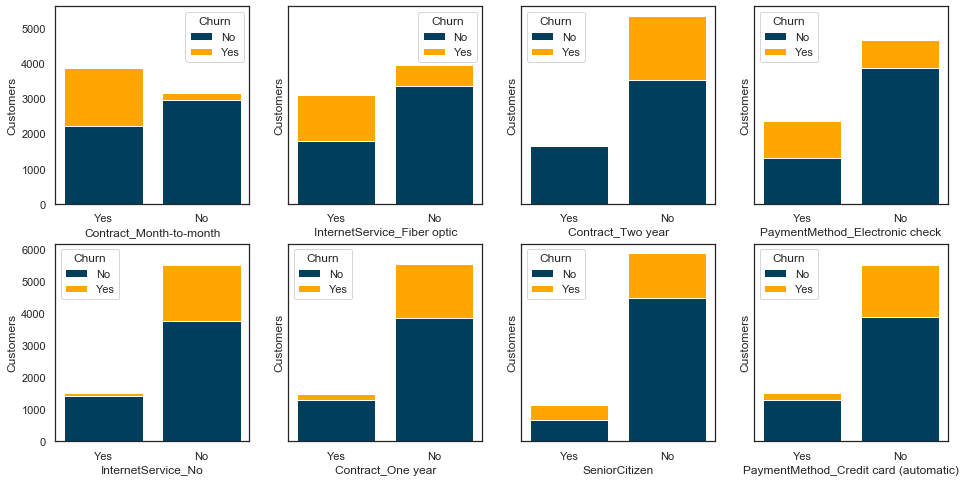

In [48]:
fig, ax = plt.subplots(2, 4, sharey='row', figsize=(16,8))
for i in range(2):
    for j in range(4):
        cat_idx = (i * 4) + j
        counts = cleaned_data.groupby(['Churn',top_cats[cat_idx]]).idx.count().unstack(level=0)
        counts = counts.sort_index(axis=0, ascending=False)
        pos = ['Yes', 'No']
        ax[i, j].bar(pos, counts[0].values, label='No', color='#003f5c', animated=True)
        ax[i, j].bar(pos, counts[1].values, bottom=counts[0].values, label='Yes', color='#ffa600', animated=True)
        ax[i, j].set_xlabel(top_cats[cat_idx])
        ax[i, j].set_ylabel('Customers')
        ax[i, j].legend(title='Churn')
fig.show()

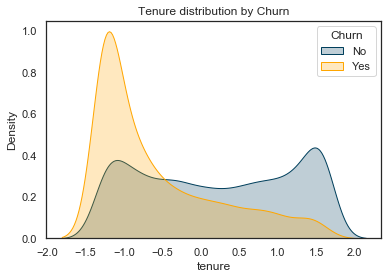

In [49]:
dplot = sb.kdeplot(cleaned_data.tenure[(cleaned_data.Churn == 0)], shade=True, color="#003f5c")
dplot = sb.kdeplot(cleaned_data.tenure[(cleaned_data.Churn == 1)], shade=True, color="#ffa600")
dplot.set_title('Tenure distribution by Churn')
legend = dplot.legend(['No','Yes'], title='Churn')

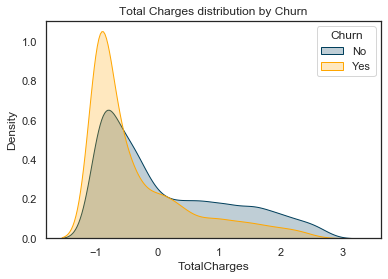

In [50]:
dplot = sb.kdeplot(cleaned_data.TotalCharges[(cleaned_data.Churn == 0)], shade=True, color="#003f5c")
dplot = sb.kdeplot(cleaned_data.TotalCharges[(cleaned_data.Churn == 1)], shade=True, color="#ffa600")
dplot.set_title('Total Charges distribution by Churn')
legend = dplot.legend(['No','Yes'], title='Churn')

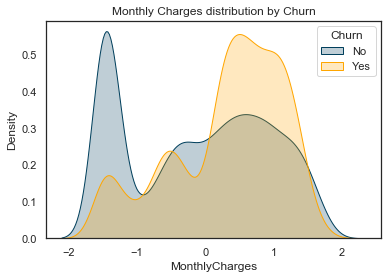

In [51]:
dplot = sb.kdeplot(cleaned_data.MonthlyCharges[(cleaned_data.Churn == 0)], shade=True, color="#003f5c")
dplot = sb.kdeplot(cleaned_data.MonthlyCharges[(cleaned_data.Churn == 1)], shade=True, color="#ffa600")
dplot.set_title('Monthly Charges distribution by Churn')
legend = dplot.legend(['No','Yes'], title='Churn')

In [52]:
import plotly.graph_objects as go

index_vals = original_data['Churn'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Tenure',
                                 values=original_data.tenure),
                            dict(label='Monthly Charges',
                                 values=original_data.MonthlyCharges),
                            dict(label='Total Charges',
                                 values=original_data.TotalCharges)],
                showupperhalf=True, # remove plots on diagonal
                diagonal_visible=True,
                marker=dict(color = index_vals,
                            colorscale = [[0, "rgb(49,54,149)"],
                                          [1, "rgb(227,26,28)"]],
                            size = 5,
                            showscale = True, # colors encode categorical variables
                            colorbar=dict(tick0="No",
                                         tickvals=[1, 0],
                                         ticktext=['Yes', 'No'],
                                         showticklabels=True,
                                         tickmode='array'),
                            line_width=0.0)
                ))



fig.update_layout(
    title='Continuous Variables Correlation',
    width=800,
    height=800,
)

fig.show()

In [53]:
cleaned_data.describe()

Contract_Month-to-month  Contract_One year  Contract_Two year  \
count              7032.000000        7032.000000        7032.000000   
mean                  0.551052           0.209329           0.239619   
std                   0.497422           0.406858           0.426881   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           0.000000           0.000000   
50%                   1.000000           0.000000           0.000000   
75%                   1.000000           0.000000           0.000000   
max                   1.000000           1.000000           1.000000   

       InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
count          7032.000000                  7032.000000         7032.000000   
mean              0.343572                     0.440273            0.216155   
std               0.474934                     0.496455            0.411650   
min               0.000000                     0.000000            0.000000   
25%               0.000000                     0.000000            0.000000   
50%               0.000000                     0.000000            0.000000   
75%               1.000000                     1.000000            0.000000   
max               1.000000                     1.000000            1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7032.000000   
mean                                  0.219283   
std                                   0.413790   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7032.000000                     7032.000000   
mean                                0.216297                        0.336320   
std                                 0.411748                        0.472483   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       SeniorCitizen      Partner   Dependents  OnlineSecurity  TechSupport  \
count    7032.000000  7032.000000  7032.000000     7032.000000  7032.000000   
mean        0.162400     0.482509     0.298493        0.286547     0.290102   
std         0.368844     0.499729     0.457629        0.452180     0.453842   
min         0.000000     0.000000     0.000000        0.000000     0.000000   
25%         0.000000     0.000000     0.000000        0.000000     0.000000   
50%         0.000000     0.000000     0.000000        0.000000     0.000000   
75%         0.000000     1.000000     1.000000        1.000000     1.000000   
max         1.000000     1.000000     1.000000        1.000000     1.000000   

       PaperlessBilling        Churn        tenure  MonthlyCharges  \
count       7032.000000  7032.000000  7.032000e+03    7.032000e+03   
mean           0.592719     0.265785 -1.126643e-16    6.062651e-17   
std            0.491363     0.441782  1.000071e+00    1.000071e+00   
min            0.000000     0.000000 -1.280248e+00   -1.547283e+00   
25%            0.000000     0.000000 -9.542963e-01   -9.709769e-01   
50%            1.000000     0.000000 -1.394171e-01    1.845440e-01   
75%            1.000000     1.000000  9.199259e-01    8.331482e-01   
max            1.000000     1.000000  1.612573e+00    1.793381e+00   

       TotalCharges          idx  
count  7.032000e+03  7032.000000  
mean  -1.119064e-16  3521.562144  
std    1.000071e+00  2032.

In [54]:
cleaned_data.drop('idx', axis=1).to_csv(path_or_buf='cleaned_data.csv')

In [85]:
dependant = np.array(cleaned_data['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = cleaned_data.drop('Churn', axis=1).drop('idx', axis=1).columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(cleaned_data.drop('Churn', axis=1).drop('idx', axis=1))
independent = pd.DataFrame(scaler.transform(cleaned_data.drop('Churn', axis=1).drop('idx', axis=1)))
independent.columns = features

In [86]:
dependant = cleaned_data['Churn']

independent = cleaned_data.drop('Churn', axis=1).drop('idx', axis=1)

In [59]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(2)
pca.fit(independent.drop('TotalCharges', axis=1))

principal_comps = pca.transform(independent.drop('TotalCharges', axis=1))

In [60]:
independent.select_dtypes('uint8').columns

Index(['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'SeniorCitizen'],
      dtype='object')

In [61]:
binary_cols = independent.select_dtypes('uint8').columns
independent[binary_cols] = independent.select_dtypes('uint8').astype('bool')

In [62]:
independent.shape

(7032, 18)

## Dimensionality Reduction Exploration

In [63]:
import prince
famd = prince.FAMD(n_components=27, n_iter=200, copy=True, engine='auto')
famd = famd.fit(independent)
print(famd.explained_inertia_)

[0.21789443276017503, 0.20050818150949032, 0.12311451942923438, 0.08457196599009961, 0.06718485004035513, 0.0496191686071874, 0.04150949221922558, 0.03785225847167633, 0.03643417016867995, 0.03594536508685275, 0.03229496610720306, 0.025431919133887117, 0.01820680350290233, 0.016079274971397488, 0.00635597842098386, 0.004615992085073484, 0.0023806614955755806, 6.214368709623558e-38]


In [64]:
result = pd.DataFrame(famd.transform(independent)[[0,1,2]])
result.columns = ['PCA%i' % i for i in range(3)]

<Figure size 2160x2160 with 0 Axes>

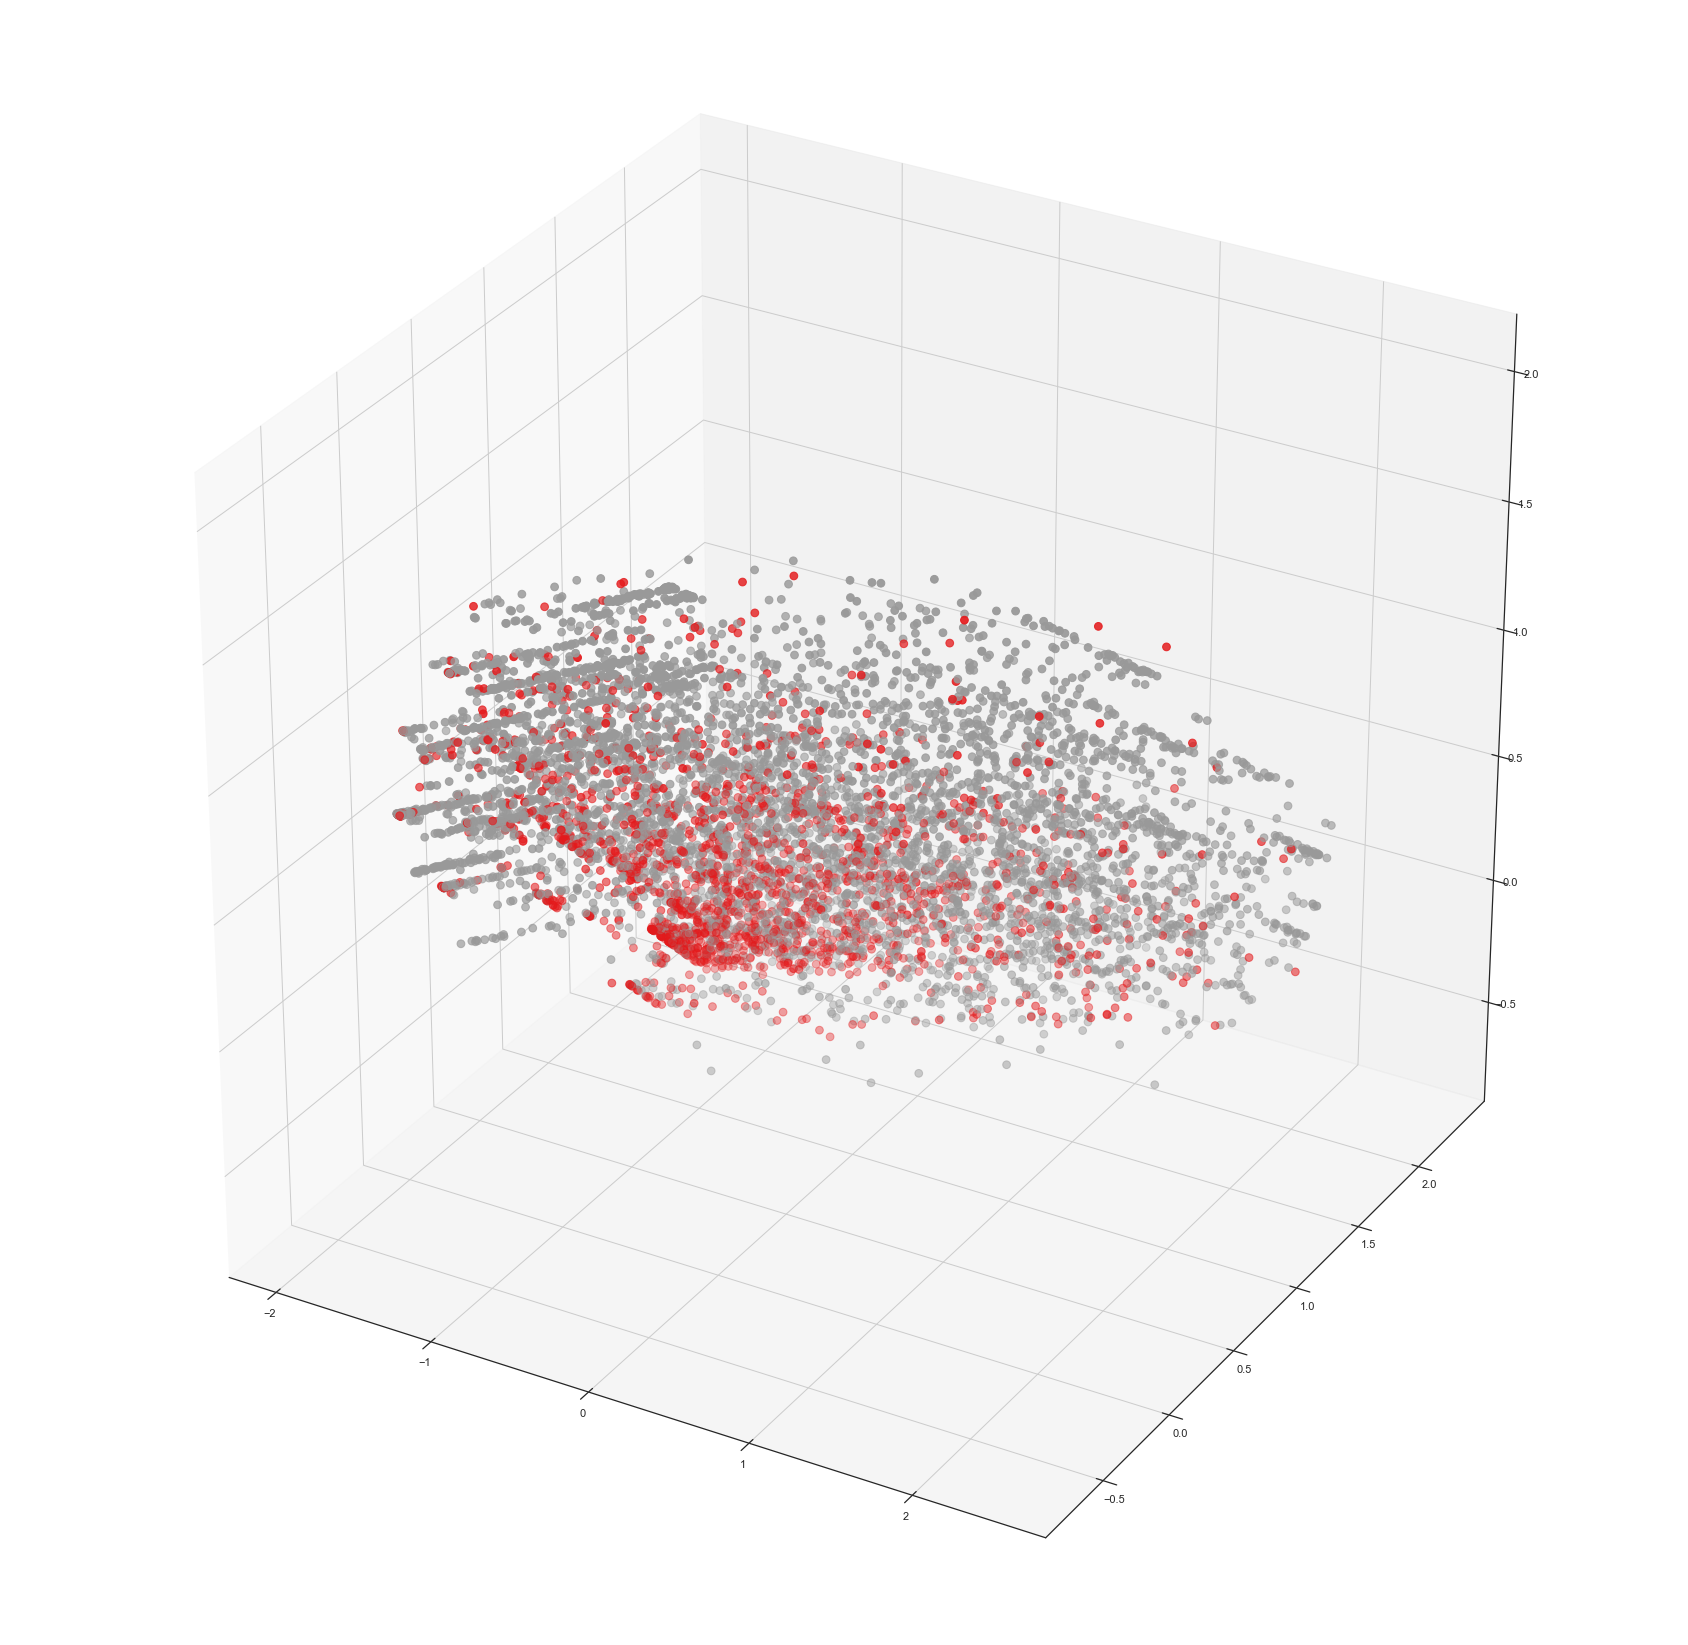

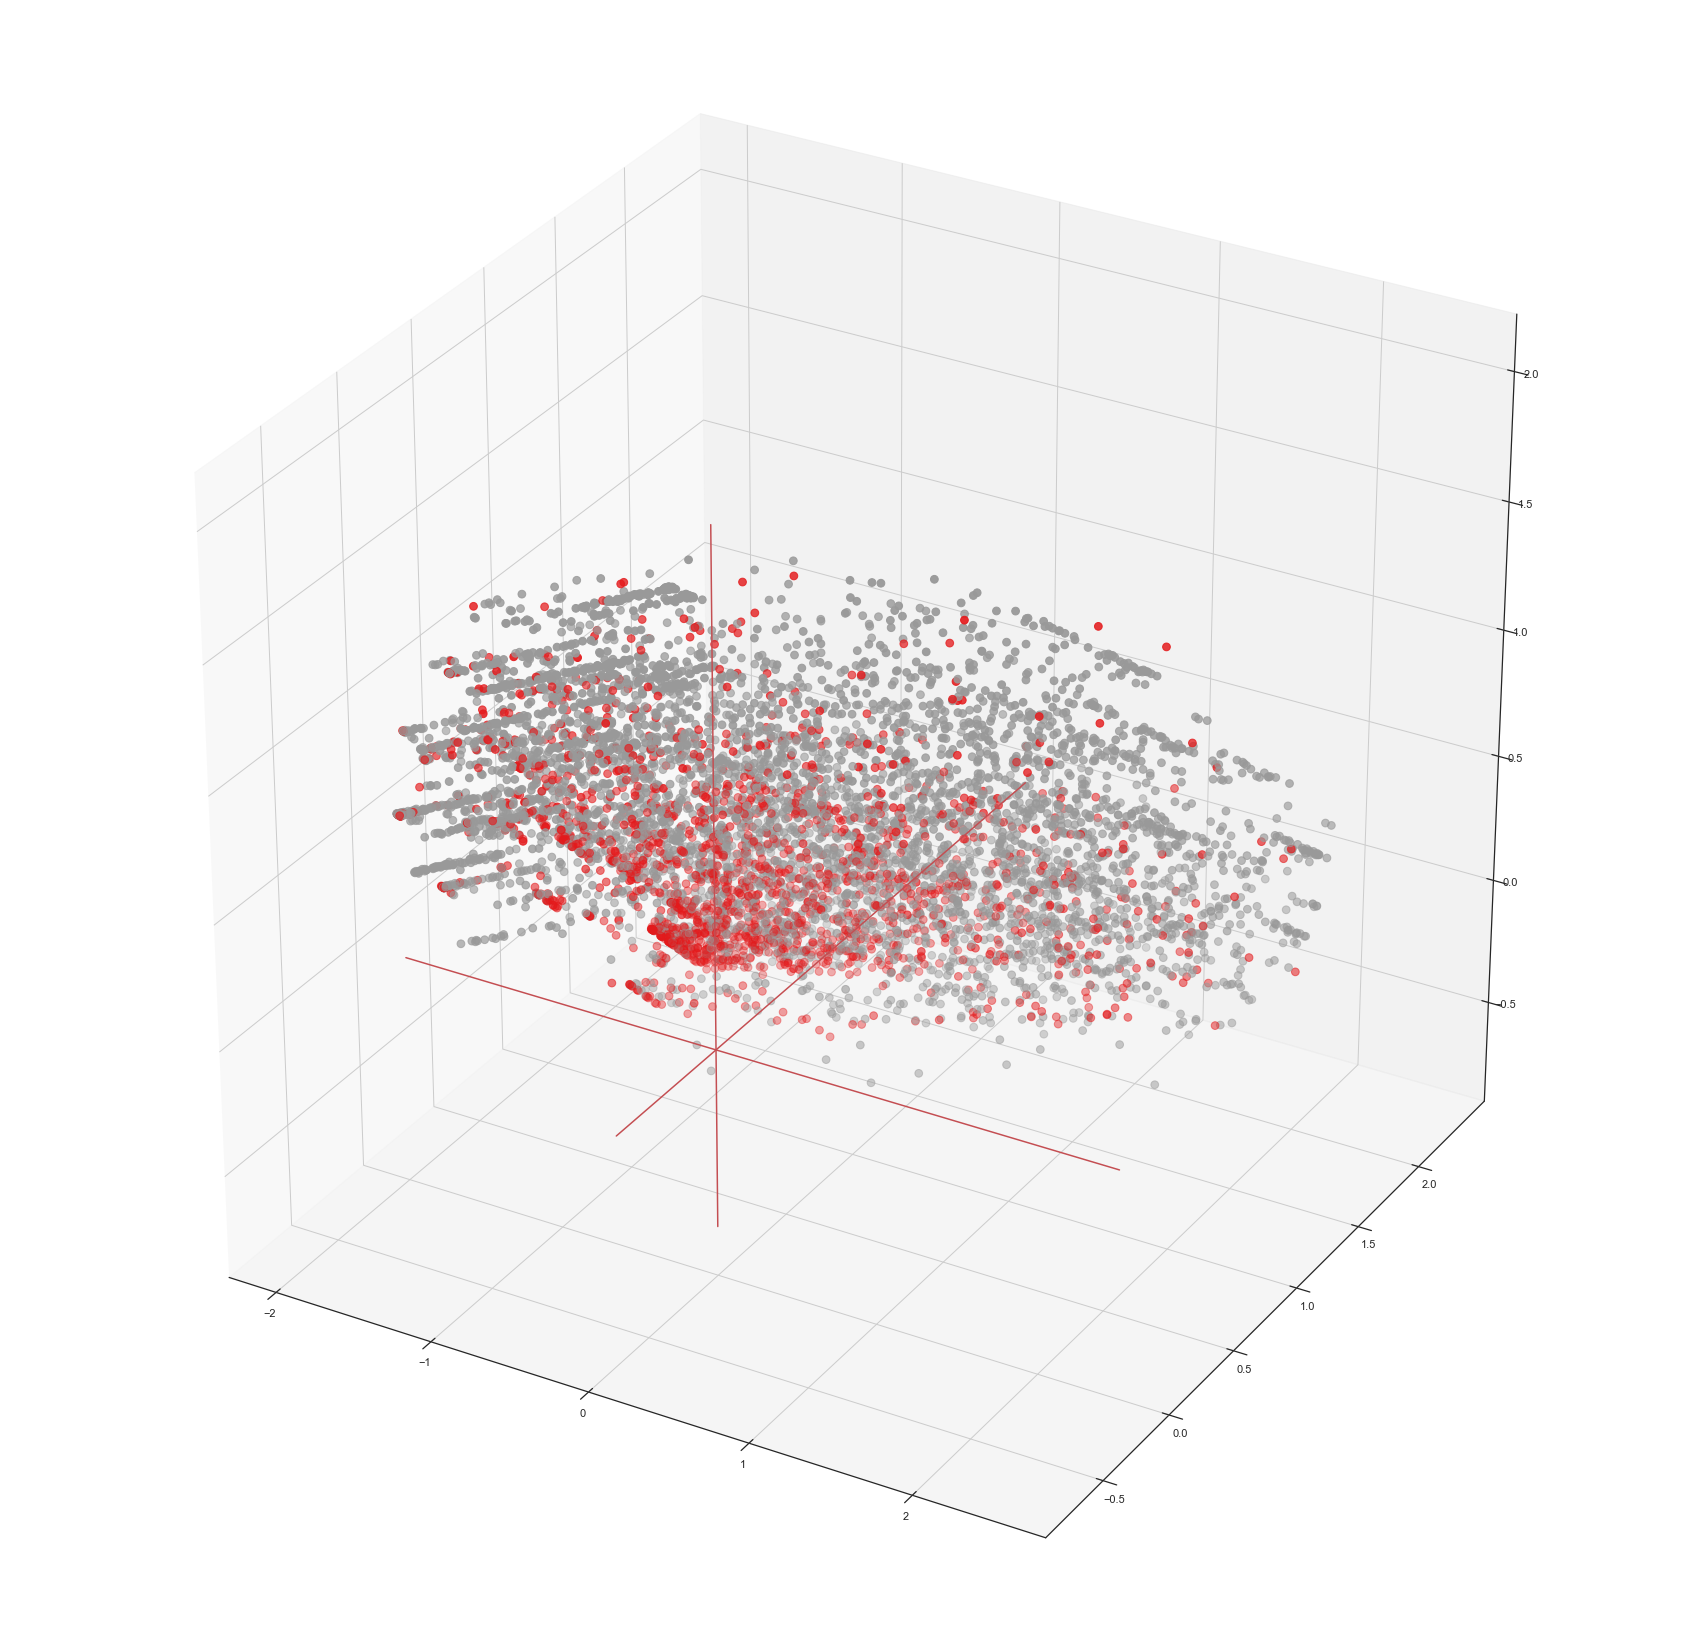

In [65]:
from mpl_toolkits import mplot3d

my_dpi=96
plt.figure(figsize=(30, 30))


fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d', )
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=dependant, cmap="Set1_r", s=60)

fig = plt.figure(figsize=(30, 30))
ax = plt.axes(projection='3d')

ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=dependant, cmap="Set1_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')


In [66]:
principal_comps = famd.transform(independent)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(principal_comps)
principal_comps = scaler.transform(principal_comps)

In [68]:
principalDf = pd.DataFrame(data = principal_comps)
finalDf = pd.concat([principalDf, cleaned_data[['Churn']]], axis = 1)

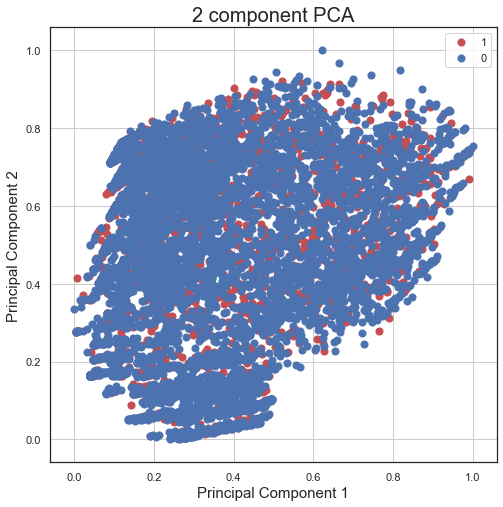

In [69]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Exploring Principal Component Correlation with Original Features

C:\Users\Brian\AppData\Roaming\Python\Python36\site-packages\prince\mfa.py:202: FutureWarning:

DataFrame/Series.to_dense is deprecated and will be removed in a future version



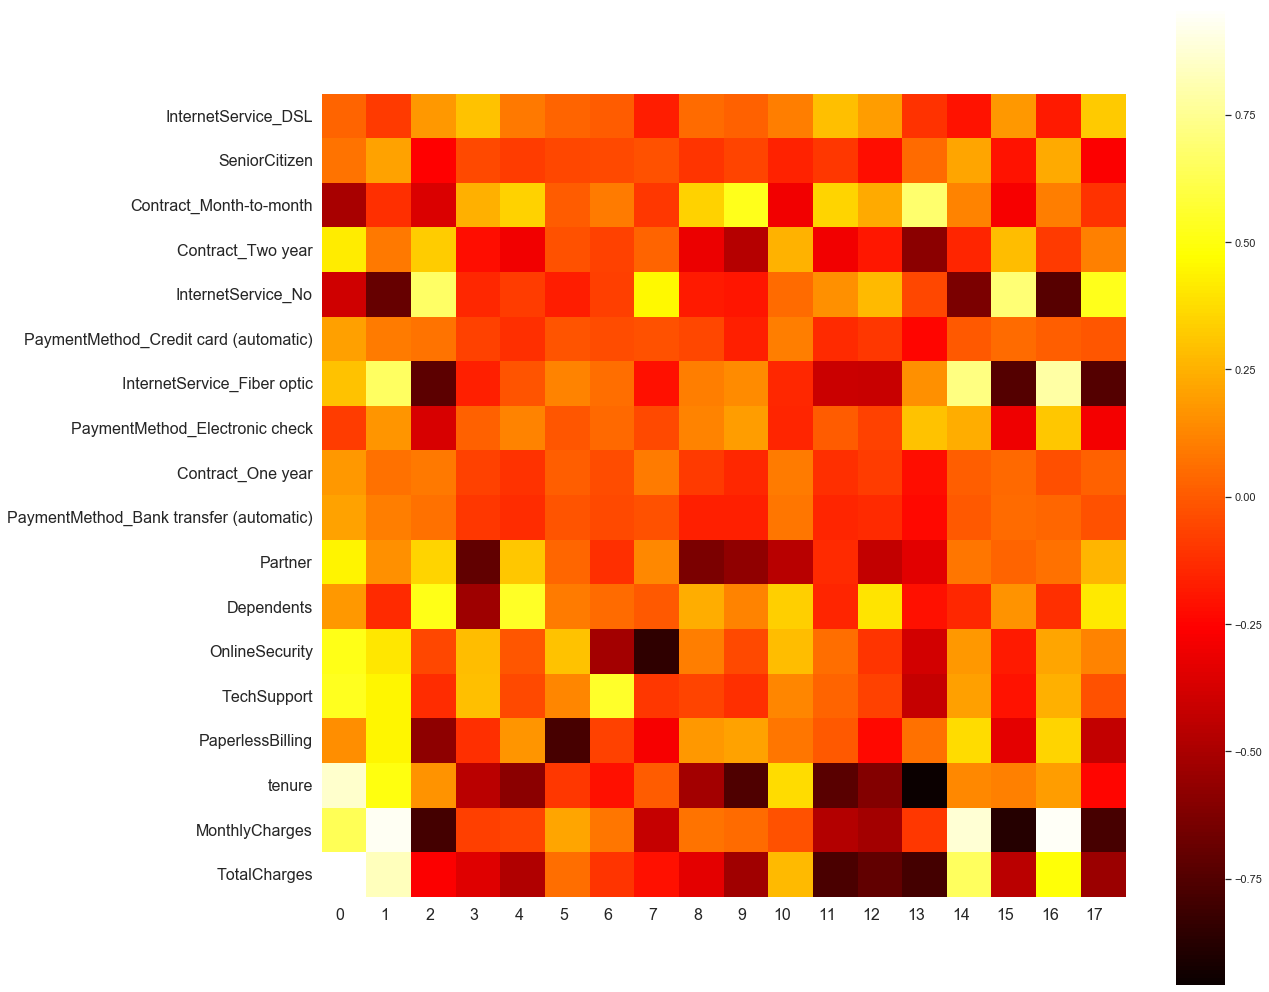

In [70]:
correlations = famd.column_correlations(independent)
f, ax = plt.subplots(figsize =(18, 18)) 
ax = sb.heatmap(
    correlations, 
    ax = ax,
    cmap='hot',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right',
    fontdict={'fontsize': 16}
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontdict={'fontsize': 16}
);

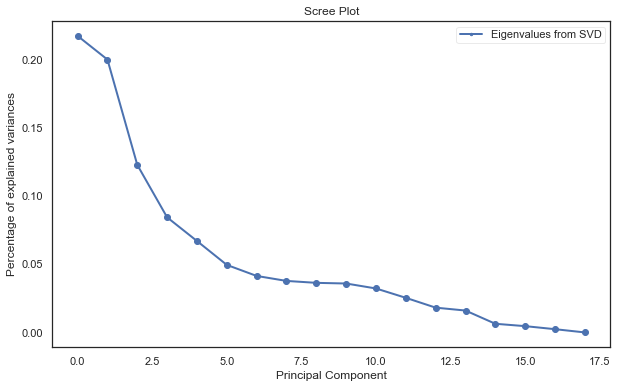

In [71]:
components = np.arange(len(famd.explained_inertia_))
fig = plt.figure(figsize=(10,6))
plt.plot(components, famd.explained_inertia_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of explained variances')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)

In [72]:
np.cumsum(famd.explained_inertia_)

array([0.21789443, 0.41840261, 0.54151713, 0.6260891 , 0.69327395,
       0.74289312, 0.78440261, 0.82225487, 0.85868904, 0.8946344 ,
       0.92692937, 0.95236129, 0.97056809, 0.98664737, 0.99300335,
       0.99761934, 1.        , 1.        ])

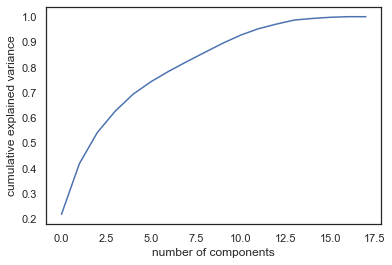

In [73]:
plt.plot(np.cumsum(famd.explained_inertia_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

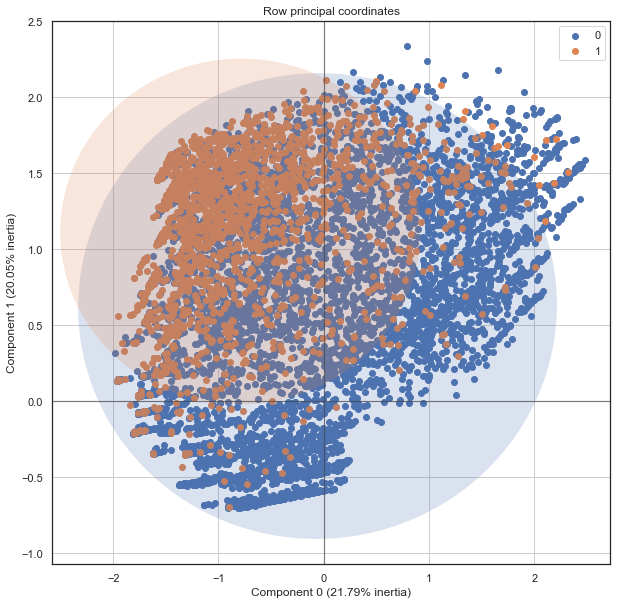

In [75]:
ax = famd.plot_row_coordinates(
        independent,
        ax=None,
        figsize=(10, 10),
        x_component=0,
        y_component=1,
        color_labels=dependant
     )

In [76]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(independent)
#independent = scaler.transform(independent)

## Predictive Model Evaluation

In [101]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(independent, 
                                                                            dependant, 
                                                                            test_size = 0.25)

In [97]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5274, 18)
Training Labels Shape: (5274,)
Testing Features Shape: (1758, 18)
Testing Labels Shape: (1758,)


In [98]:
from sklearn.tree import DecisionTreeClassifier 

# Instantiate model with 1000 decision trees
##rf = RandomForestClassifier(n_estimators = 1000, max_features = 'auto', max_leaf_nodes=20, random_state=42)
dt = DecisionTreeClassifier()

# Train the model on training data
dt.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = dt.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy: {:.3f}'.format(accuracy_score(test_labels, predictions)))

Mean Absolute Error: 0.26
Accuracy: 0.744


In [99]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators=500, n_jobs = -1,
                                  max_features = "auto",
                                  max_leaf_nodes = 20)

# Train the model on training data
rf.fit(train_features, train_labels)

# Predict on the test dataset
predictions = rf.predict(test_features)
# Calculate the absolute error
errors = abs(predictions - test_labels)
# Display the MAE and Accuracy scores of the model from the test data
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Accuracy: {:.3f}'.format(accuracy_score(test_labels, predictions)))

Mean Absolute Error: 0.2
Accuracy: 0.800


### Feature Importance

Identify the most important features on from the RandomForest model.

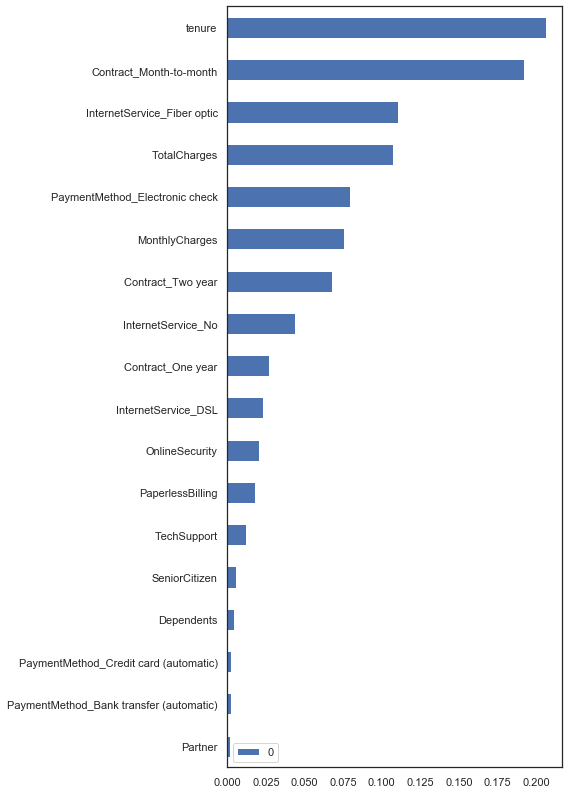

In [100]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=independent.columns)
feature_importances = feature_importances.sort_values(0, ascending=True)
feature_importances.plot(kind='barh', figsize=(6,14))

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat = confusion_matrix(test_labels, predictions)

In [89]:
pd.DataFrame(conf_mat)

0    1
0  1188  106
1   234  230

Confusion matrix, without normalization
[[1188  106]
 [ 234  230]]


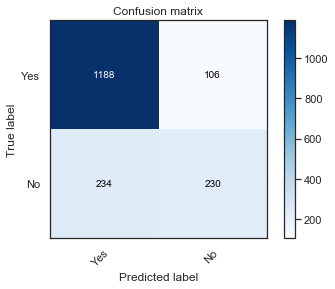

In [91]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

plot_confusion_matrix(test_labels, predictions, classes=['Yes', 'No'],
                      title='Confusion matrix')


plt.show()

In [92]:
from sklearn.ensemble import ExtraTreesClassifier

In [93]:
ec = ExtraTreesClassifier(n_estimators = 100)
ec.fit(train_features,train_labels)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [94]:
importance = pd.DataFrame(zip(independent.columns, rf.feature_importances_))

In [95]:
importance = importance.sort_values(by=1, ascending=False)
print(importance)

                                          0         1
0                   Contract_Month-to-month  0.228380
15                                   tenure  0.172104
4               InternetService_Fiber optic  0.110015
17                             TotalCharges  0.105375
16                           MonthlyCharges  0.091638
8            PaymentMethod_Electronic check  0.079331
2                         Contract_Two year  0.061811
5                        InternetService_No  0.038831
1                         Contract_One year  0.022893
3                       InternetService_DSL  0.020941
12                           OnlineSecurity  0.019623
14                         PaperlessBilling  0.016739
13                              TechSupport  0.015775
9                             SeniorCitizen  0.006313
11                               Dependents  0.003829
10                                  Partner  0.002774
7     PaymentMethod_Credit card (automatic)  0.002172
6   PaymentMethod_Bank trans

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels, predictions)

0.1945392491467577

In [180]:
# Import the model we are using
from sklearn.linear_model import LogisticRegression

# Instantiate model with 1000 decision trees
lr = LogisticRegression(solver='newton-cg')

# Train the model on training data
lr.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = lr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Squared Error:', mean_squared_error(test_labels, predictions))
print('Accuracy: {:.3f}'.format(accuracy_score(test_labels, predictions)))

Mean Absolute Error: 0.18 degrees.
Mean Squared Error: 0.17804323094425484
Accuracy: 0.822


In [62]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42, loss='squared_hinge', dual=False) 
svm.fit(train_features,train_labels)
predictions = svm.predict(test_features)
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy: {:.3f}'.format(accuracy_score(test_labels, predictions)))

Mean Absolute Error: 0.2 degrees.
Accuracy: 0.802


In [63]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='modified_huber', penalty='l1', random_state=42) 
svm.fit(train_features,train_labels)
predictions = svm.predict(test_features)
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy: {:.3f}'.format(accuracy_score(test_labels, predictions)))

Mean Absolute Error: 0.31 degrees.
Accuracy: 0.691


In [64]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.075)
model.fit(train_features,train_labels)
predictions = model.predict(test_features)
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy: {:.3f}'.format(accuracy_score(test_labels, predictions)))

Mean Absolute Error: 0.2 degrees.
Accuracy: 0.799


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear') 
svm.fit(train_features,train_labels)
predictions = svm.predict(test_features)
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy: {:.3f}'.format(accuracy_score(test_labels, predictions)))

In [539]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
clus = linkage(cleaned_data, 'average')

In [541]:
c, coph_dists = cophenet(clus, pdist(cleaned_data))
c

0.7497112734398996

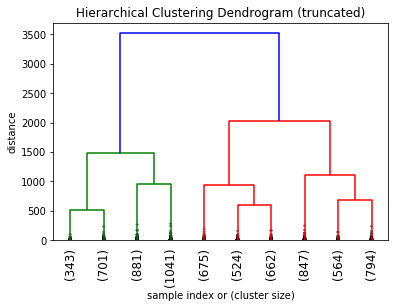

In [542]:
%matplotlib inline
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    clus,
    truncate_mode='lastp', 
    p=10,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()